### Практическое задание

#### 1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:
    а) зависимость цены на недвижимость в конкретном регионе от времени, <br>
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В, <br>
    в) количество отказов компьютера, <br>
    г) число обращений в поликлинику по району, <br>
    д) координаты автобуса при движении по маршруту, <br>
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы. <br>

https://ru.wikipedia.org/wiki/Временной_ряд

Временно́й ряд (или ряд динамики) — собранный в разные моменты времени статистический материал о значении каких-либо параметров (в простейшем случае одного) исследуемого процесса. Каждая единица статистического материала называется измерением или отсчётом, также допустимо называть его уровнем на указанный с ним момент времени. Во временном ряде для каждого отсчёта должно быть указано время измерения или номер измерения по порядку. Временной ряд существенно отличается от простой выборки данных, так как при анализе учитывается взаимосвязь измерений со временем, а не только статистическое разнообразие и статистические характеристики выборки.

а) зависимость цены на недвижимость в конкретном регионе от времени - временной ряд, так как цена на недвижимость может изменяться со временем в зависимости от развития инфраструктуры региона и/или от сезона <br>

б) скорость полета самолета при перелете из аэропорта А в аэропорт В - временной ряд, так как на каждый момент времени при перелете и А в В скорость самолета разная (взлет / набор высоты / крейсерская скорость / снижение / посадка) <br>

в) количество отказов компьютера - временной ряд, в том случае если эти данные собраны в разные моменты времени (желательно и с одинаковой переодичностью: минута / час / сутки); в том случае если это скалярное значение - то это не временной ряд <br>

г) число обращений в поликлинику по району - временной ряд в том случае если эти данные собраны в разные моменты времени (желательно и с одинаковой переодичностью: день / неделя / месяц / квартал / год); в том случае если это скалярное значение - то это не временной ряд <br>

д) координаты автобуса при движении по маршруту - формально, данный набор данных подходит под описание временного ряда; автобус движется по маршруту, его координаты меняются во времени <br>

е) координаты фигуры нарушителя в файле видеофиксации охранной системы - формально, данный набор данных подходит под описание временного ряда; файл видеофиксации содержит видеозапись, которая ограниченна во времени (начало записи / конец записи), появление координат фигуры нарушителя (например в результате обработки видеоряда) позволяет нам на конкретный момент времени видиозаписи фиксировать положение нарушителя в пространстве <br>

#### 2. вариант 1)
Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки. <br>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

%matplotlib inline

In [2]:
df_duq = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

df_duq.head(2)

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0


In [3]:
df_duq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [4]:
df_duq.describe().T

,count,mean,std,min,25%,50%,75%,max
DUQ_MW,119068.0,1658.820296,301.74064,1014.0,1444.0,1630.0,1819.0,3054.0


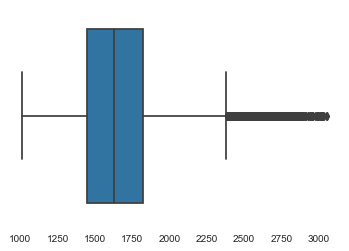

In [5]:
sns.boxplot(df_duq.values);

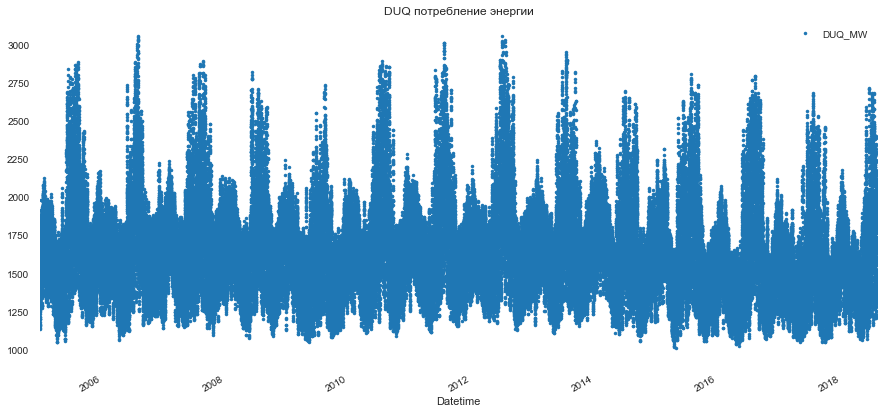

In [6]:
df_duq.plot(style='.', figsize=(15, 7), title='DUQ потребление энергии');

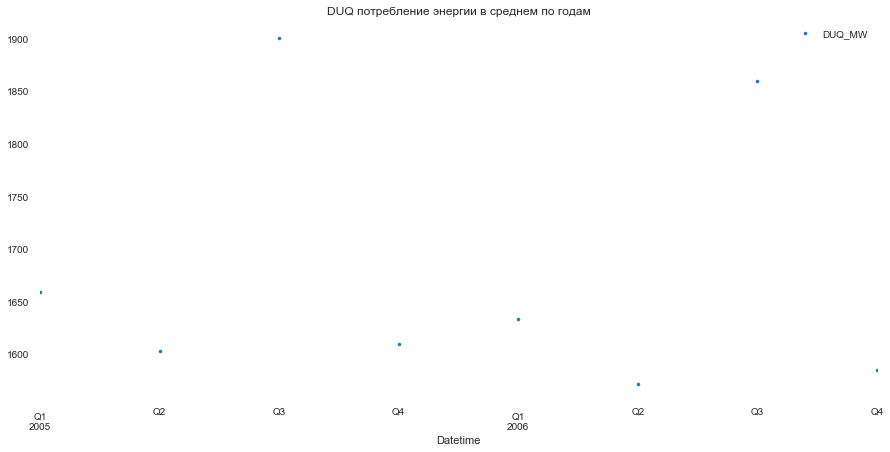

In [7]:
df_duq[df_duq.index < '2007-01-01'] \
    .resample('Q').mean().plot(style='.', figsize=(15, 7), title='DUQ потребление энергии в среднем по годам');

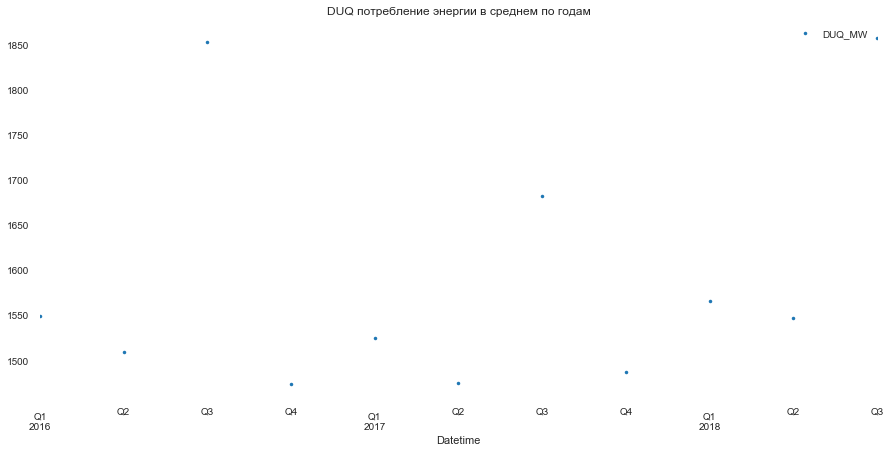

In [8]:
df_duq[df_duq.index >= '2016-01-01'] \
    .resample('Q').mean().plot(style='.', figsize=(15, 7), title='DUQ потребление энергии в среднем по годам');

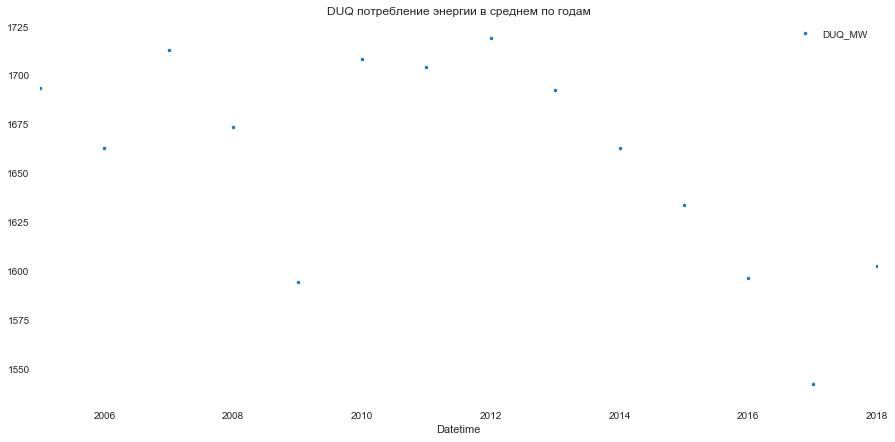

In [9]:
df_duq.resample('Y').mean().plot(style='.', figsize=(15, 7), title='DUQ потребление энергии в среднем по годам');

Выборка не содержит в себе пропущенных значений (измерений). К особенностям выборки можно отнести:
 - увеличиение среднего потребления электроэнергии в 3 квартале внутри года
 - резкое падение среднего потребления электроэнергии в 2009 году
 - постепенное снижение среднего потребления с 2012 по 2017 гг.

#### 2. вариант2) 
COVID19 EDA для любой страны кроме Китая с длиной ряда больше 50 дней ( можно обновить данные по ссылке). <br>

https://www.kaggle.com/imdevskp/corona-virus-report/discussion

In [10]:
df_covid = pd.read_csv('corona-virus-report/covid_19_clean_complete.csv', parse_dates=[4])

df_covid.head(2)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0


In [11]:
df_covid.set_index('Date', inplace=True)

In [12]:
df_covid_fr = df_covid.loc[df_covid['Country/Region'] == 'France', :] \
    .groupby(df_covid[df_covid['Country/Region'] == 'France'].index)[['Confirmed']].sum()

In [13]:
df_covid_fr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2020-01-22 to 2020-04-07
Data columns (total 1 columns):
Confirmed    77 non-null int64
dtypes: int64(1)
memory usage: 1.2 KB


In [14]:
df_covid_fr.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,77.0,12822.61039,25646.732643,0.0,11.0,100.0,10970.0,110065.0


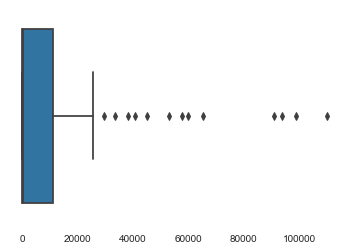

In [15]:
sns.boxplot(df_covid_fr.values);

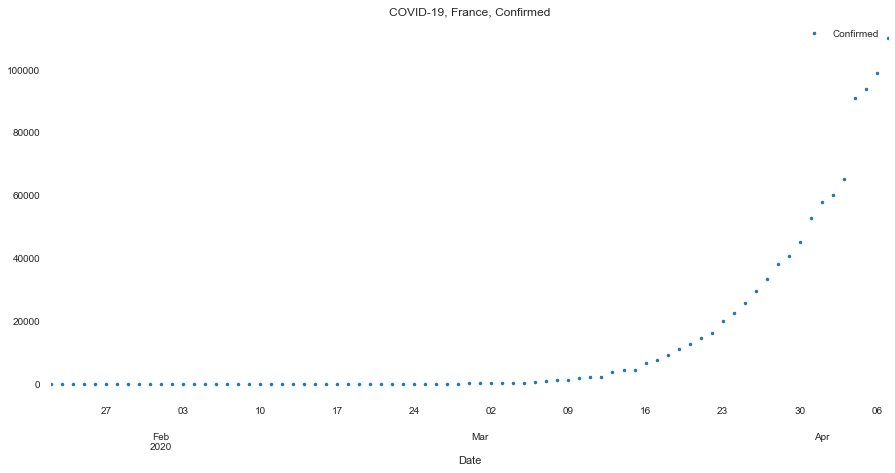

In [16]:
df_covid_fr.plot(style='.', figsize=(15, 7), title='COVID-19, France, Confirmed');

На графике виден резкий скачок заболеваемости в апреле во Франции.

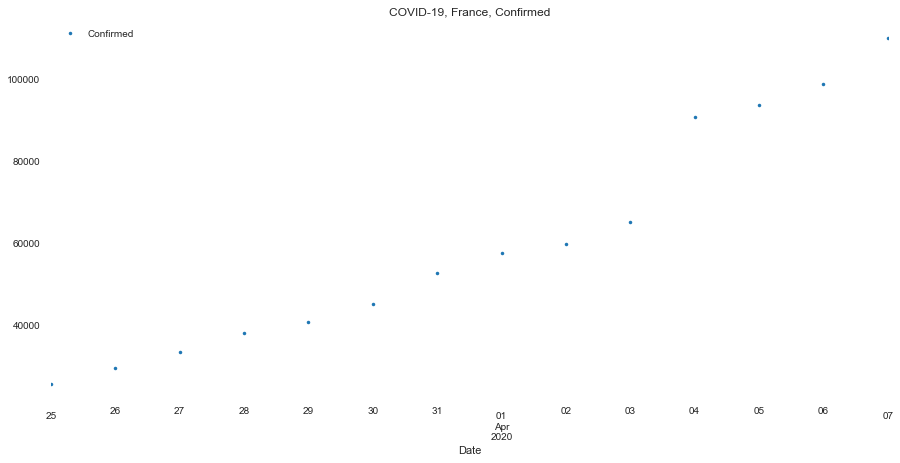

In [17]:
df_covid_fr[df_covid_fr.index >= '2020-03-25'].plot(style='.', figsize=(15, 7), title='COVID-19, France, Confirmed');

При детальном рассмотрении видно, что скачок выявленных случаев заболевания во Франции произошел с 3 на 4 апреля 2020 года.

#### 3. вариант 1)
Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам . Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent. (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

In [18]:
df_brent = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

df_brent.head(2)

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19


In [19]:
df_brent.rename(columns={'Значение': 'Value'}, index={'Дата': 'Date'}, inplace=True)

In [20]:
df_brent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
Value    2667 non-null float64
dtypes: float64(1)
memory usage: 41.7 KB


In [21]:
df_brent.describe().T

,count,mean,std,min,25%,50%,75%,max
Value,2667.0,81.533547,26.349469,27.85,56.84,77.71,108.19,126.9


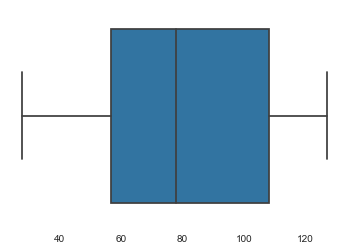

In [22]:
sns.boxplot(df_brent.values);

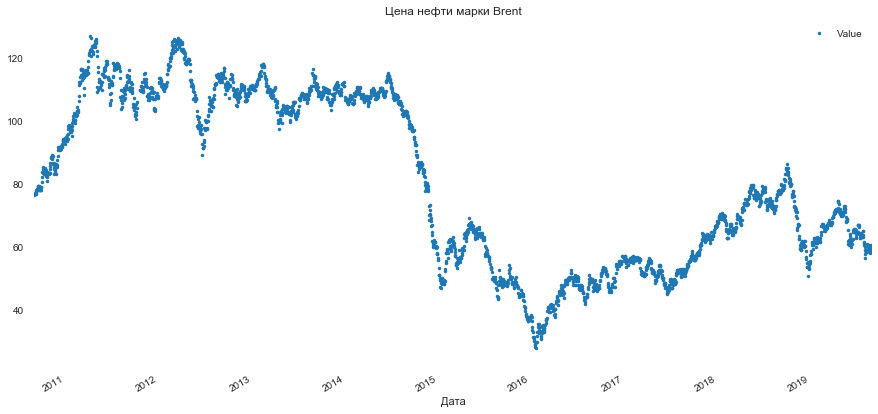

In [23]:
df_brent.plot(style='.', figsize=(15, 7), title='Цена нефти марки Brent');

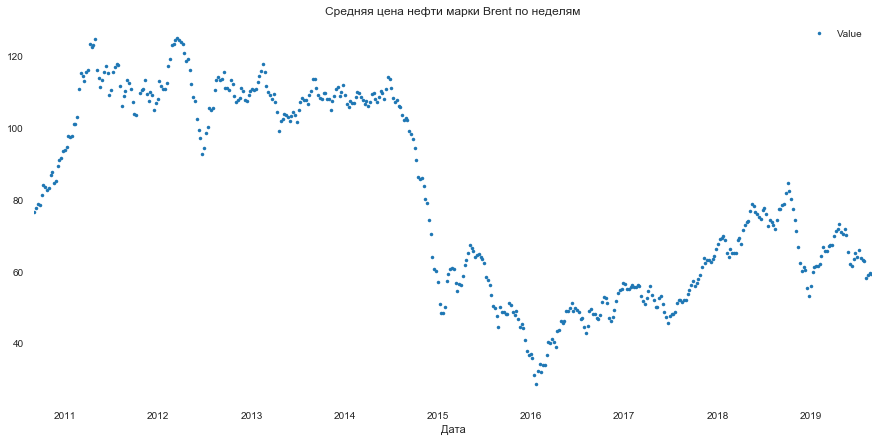

In [24]:
df_brent.resample('W').mean().plot(style='.', figsize=(15, 7), title='Средняя цена нефти марки Brent по неделям');

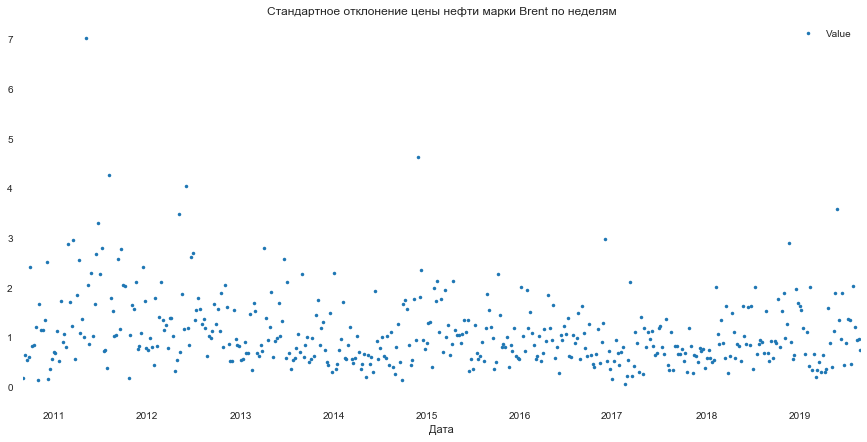

In [25]:
df_brent.resample('W').std().plot(style='.', figsize=(15, 7), title='Стандартное отклонение цены нефти марки Brent по неделям');

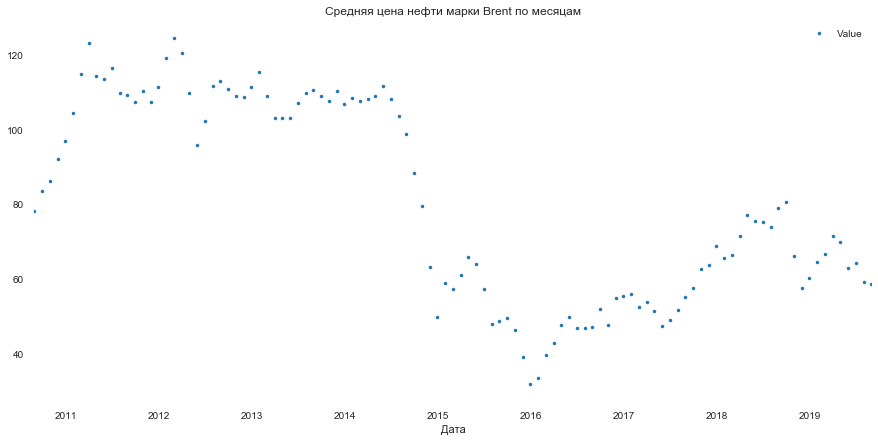

In [26]:
df_brent.resample('M').mean().plot(style='.', figsize=(15, 7), title='Средняя цена нефти марки Brent по месяцам');

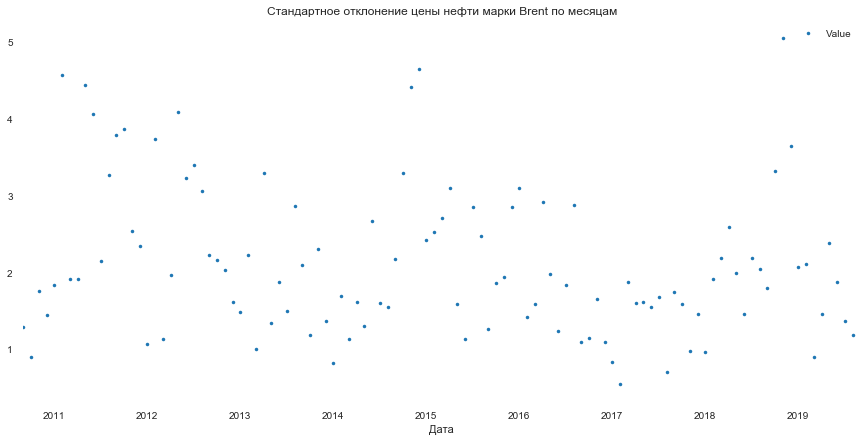

In [27]:
df_brent.resample('M').std().plot(style='.', figsize=(15, 7), title='Стандартное отклонение цены нефти марки Brent по месяцам');

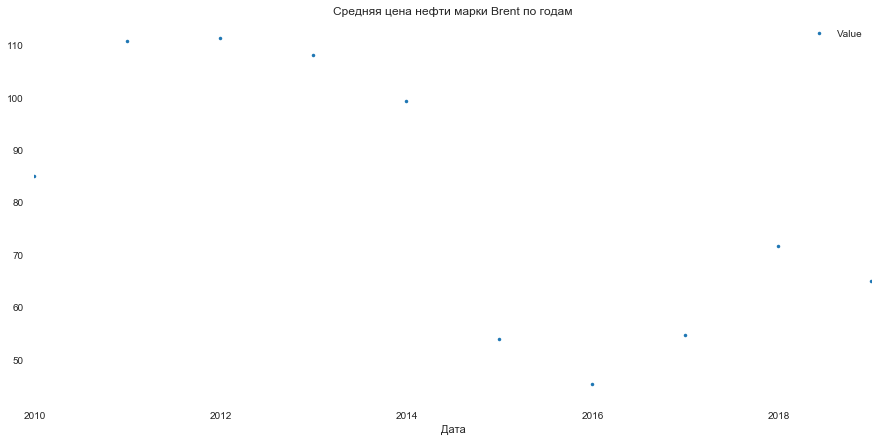

In [28]:
df_brent.resample('Y').mean().plot(style='.', figsize=(15, 7), title='Средняя цена нефти марки Brent по годам');

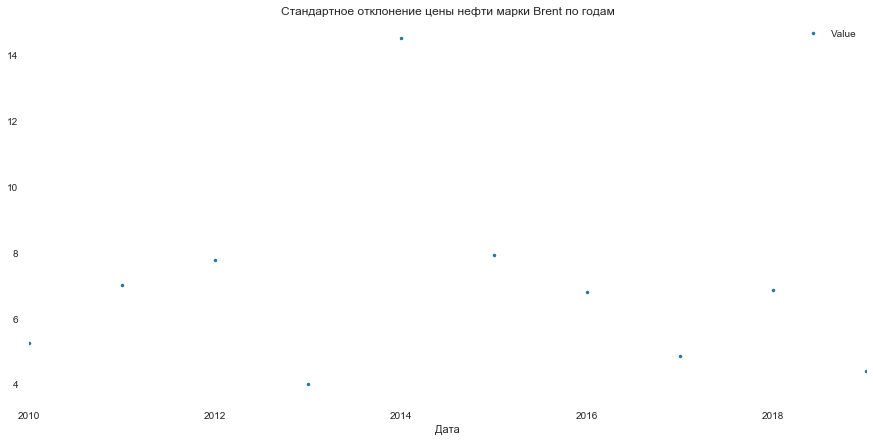

In [29]:
df_brent.resample('Y').std().plot(style='.', figsize=(15, 7), title='Стандартное отклонение цены нефти марки Brent по годам');

#### 3. вариант 2)
Сделайте ресемплинг COVID19 на интервалы 3 дня, неделя, 2 недели.Постройте график изменения среднего по выборке и среднего отклонения по выборке на группах для интервалах 3 дня, неделя, 2 недели (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

https://www.kaggle.com/imdevskp/corona-virus-report/discussion

In [30]:
df_covid = pd.read_csv('corona-virus-report/covid_19_clean_complete.csv', parse_dates=[4])

df_covid.head(2)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0


In [31]:
df_covid.set_index('Date', inplace=True)

In [32]:
df_covid_aus = df_covid.loc[df_covid['Country/Region'] == 'Australia', :] \
    .groupby(df_covid[df_covid['Country/Region'] == 'Australia'].index)[['Confirmed']].sum()

In [33]:
df_covid_aus.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2020-01-22 to 2020-04-07
Data columns (total 1 columns):
Confirmed    77 non-null int64
dtypes: int64(1)
memory usage: 1.2 KB


In [34]:
df_covid_aus.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,77.0,966.038961,1787.144278,0.0,15.0,25.0,681.0,5895.0


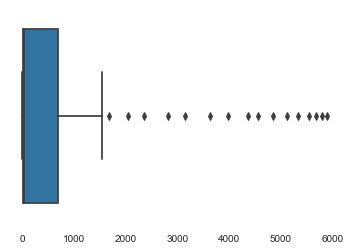

In [35]:
sns.boxplot(df_covid_aus.values);

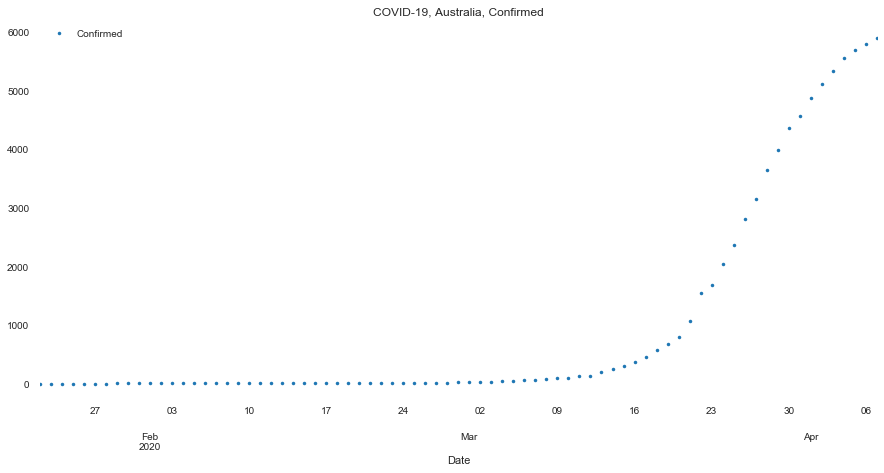

In [36]:
df_covid_aus.plot(style='.', figsize=(15, 7), title='COVID-19, Australia, Confirmed');

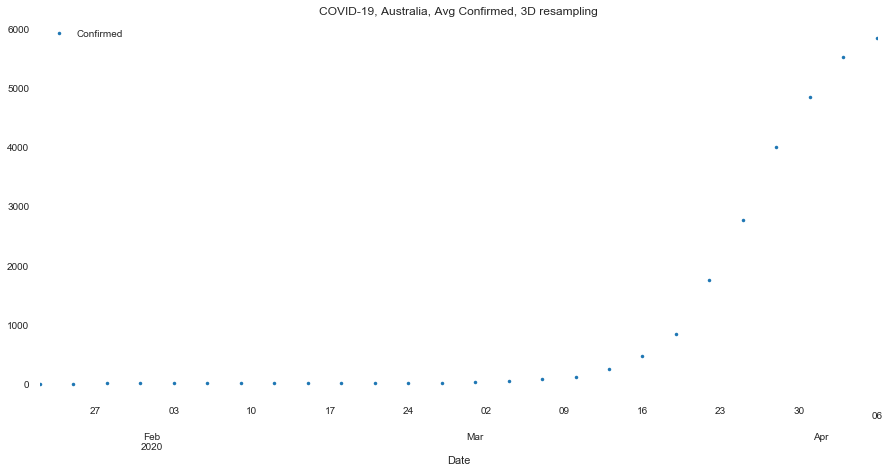

In [37]:
df_covid_aus.resample('3D').mean().plot(style='.', figsize=(15, 7), title='COVID-19, Australia, Avg Confirmed, 3D resampling');

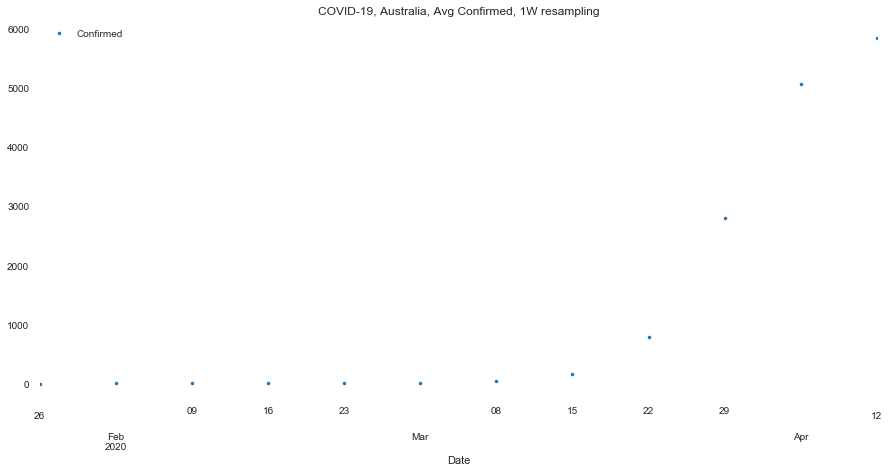

In [38]:
df_covid_aus.resample('W').mean().plot(style='.', figsize=(15, 7), title='COVID-19, Australia, Avg Confirmed, 1W resampling');

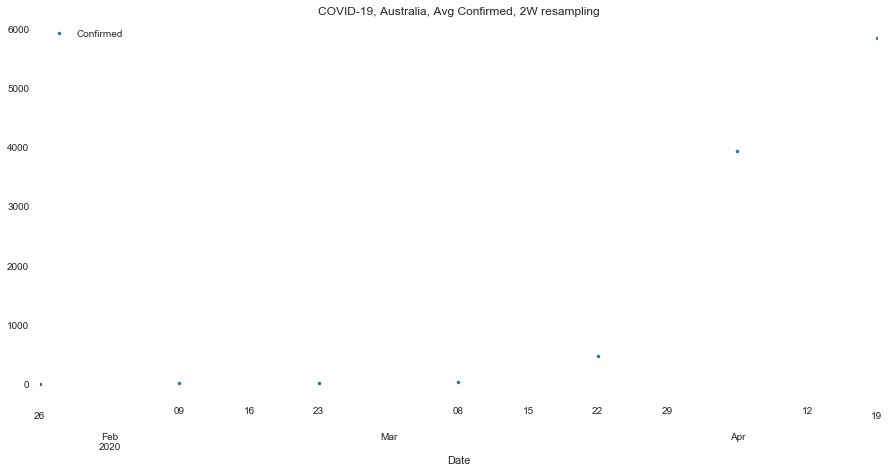

In [39]:
df_covid_aus.resample('2W').mean().plot(style='.', figsize=(15, 7), title='COVID-19, Australia, Avg Confirmed, 2W resampling');

#### 4. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

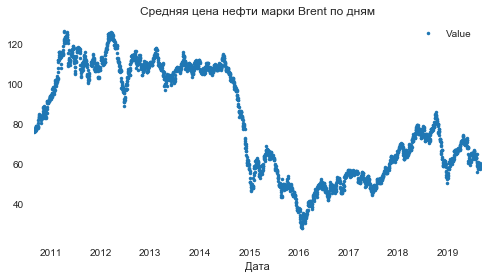

In [40]:
df_brent.resample('D').mean().plot(style='.', figsize=(8, 4), title='Средняя цена нефти марки Brent по дням');

Дневной график цент на нефть марки Brent.

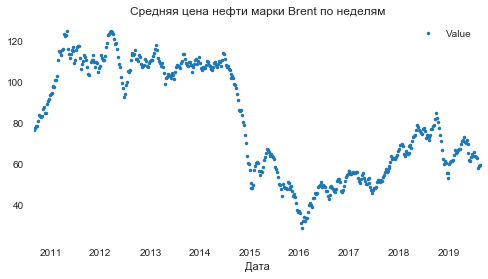

In [41]:
df_brent.resample('W').mean().plot(style='.', figsize=(8, 4), title='Средняя цена нефти марки Brent по неделям');

На недельном графике сгладилась внутредневная волатильность цены на нефть марки Brent по сравненению с дневным графиком.

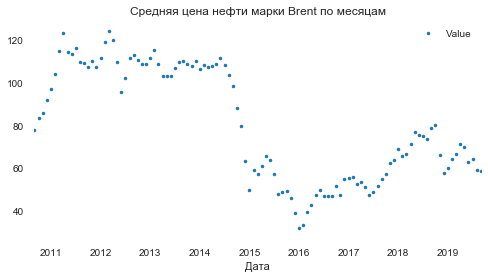

In [42]:
df_brent.resample('M').mean().plot(style='.', figsize=(8, 4), title='Средняя цена нефти марки Brent по месяцам');

На месячном графике цена нефти марки Brent выглядит более гладко, так как мы избавились от внутредневной и внтренедельной волатильности.